In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline


from abg_python.galaxy.gal_utils import Galaxy
from abg_python.all_utils import filterDictionary

from firestudio.studios.gas_studio import GasStudio


In [2]:
matplotlib.rcParams['figure.dpi'] = 150

Create an abg_python$^\mathrm{TM}$ Galaxy instance

In [3]:
snapdir = "/scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12i_res7100/output"
snapnum = 600 
galaxy = Galaxy(
    'm12i_res7100',
    snapdir,
    600,
    datadir='/scratch/04210/tg835099/data/metal_diffusion')

Couldn't find a metadata file... for
 Metadata object at /scratch/04210/tg835099/data/metal_diffusion/m12i_res7100/metadata/meta_Galaxy_600.hdf5


Locate the main halo, center our coordinates, and rotate to be face-on.

In [4]:
galaxy.extractMainHalo()

Using the saved sub-snapshots
Successfully loaded a pre-extracted subsnap
Reorienting...
Done.
extract_halo_inner(m12i_res7100_md at 600,){'orient_stars': True} 17.16 s elapsed
Snapshot memory free


(14.389217379832706,
 True,
 2.5881896910344975,
 -2.7838931910077562,
 35229529313569.195,
 44642473899919.32,
 268.00569800569804,
 2.877843475966541)

## Make a simple 2D histogram to give us an idea of what to expect

We'll restrict our plot to a 20 kpc cube. 

In [5]:
disk_mask = np.ones(galaxy.sub_snap['Masses'].size)
xs,ys,zs = galaxy.sub_snap['Coordinates'].T

disk_mask = (np.abs(xs) < 20) & (np.abs(ys) < 20) & (np.abs(zs) < 20)

Let's do a mass-weighted temperature histogram

/home1/04210/tg835099/work/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/home1/04210/tg835099/work/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


/home1/04210/tg835099/work/miniconda3/envs/python3/lib/python3.6/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


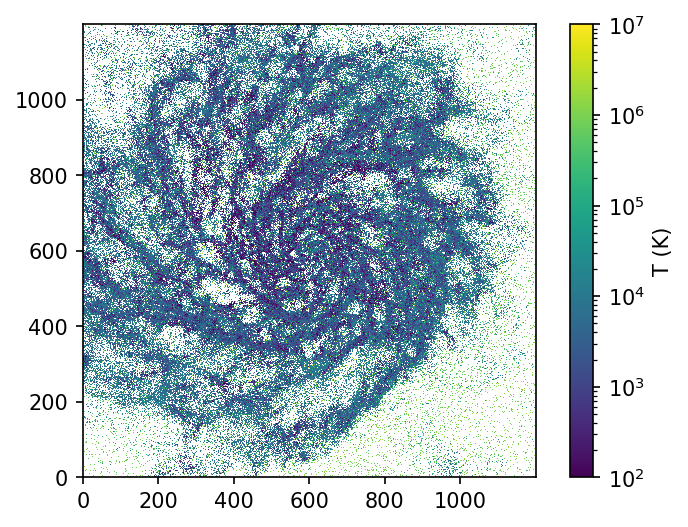

In [6]:
from matplotlib.colors import LogNorm
h_mt,xedges,yedges = np.histogram2d(
    xs[disk_mask],
    ys[disk_mask],
    bins=1200,
    weights=galaxy.sub_snap['Masses'][disk_mask]*galaxy.sub_snap['Temperature'][disk_mask])

h_m,xedges,yedges = np.histogram2d(
    xs[disk_mask],
    ys[disk_mask],
    bins=1200,
    weights=galaxy.sub_snap['Masses'][disk_mask])

plt.imshow((h_mt/h_m).T,norm=LogNorm(vmin=100,vmax=1e7),origin='lower')
plt.gca().set_aspect(1)
plt.colorbar(label='T (K)')

## Creating the GasStudio class instance

Create the GasStudio instance. Any keyword argument that's used by `set_ImageParams` can be passed into the initialization call. Those keyword arguments, and their descriptions, can be found [here](https://github.com/agurvich/FIRE_studio/wiki/gas_studio#studioset_imageparams).

In [7]:
## let's put the FIREstudio projections into a sub-directory of our Galaxy class instance
studio_datadir = os.path.join(os.path.dirname(galaxy.datadir),'firestudio')

## initialize the GasStudio instance
my_gasStudio = GasStudio(
    studio_datadir,
    galaxy.snapnum,
    studio_datadir,
    gas_snapdict=galaxy.sub_snap, ## pass in snapshot dictionary
    star_snapdict=galaxy.sub_star_snap, ## pass in snapshot dictionary
    )

setting use_colorbar to default value of: False
setting cbar_label to default value of: 
setting cbar_logspace to default value of: True
setting snapnum to user value of: 600
setting sim_name to user value of: /scratch/04210/tg835099/data/metal_diffusion/firestudio
setting frame_half_width to default value of: 15
setting frame_half_thickness to default value of: 15
setting frame_center to default value of: [0. 0. 0.]
setting theta to default value of: 0
setting phi to default value of: 0
setting psi to default value of: 0
setting aspect_ratio to default value of: 1
setting pixels to default value of: 1200
setting figure_label to default value of: 
setting scale_bar to default value of: True
setting scale_line_length to default value of: 5
setting noaxis to default value of: True
setting savefig to default value of: None
setting fontsize to default value of: 12
setting snapdir to default value of: None


Make a mass-weighted Temperature map by declaring the weights to be the snapshot dictionary key 'Masses'
and the quantity to be the snapshot dictionary key 'Temperature.' These keys are mandatory, but one 
can avoid having to add things to the snapshot dictionary by passing in the optional keyword arguments
`weights` and `quantities`. 

By setting `min_quantity` and `max_quantity` by keyword argument we specify
that we want to plot the quantity of interest, in this case the Temperature. 
We will return to this point later on. 

The `quantity_adjustment_function` is applied *after* projection and is useful for changing the units, 
or to take the log in the this case. The `min/max_quantity` applies to the post-adjusted map. 

After the first call the `massMap` and `massWeightedTemperatureMap` will be cached so future calls (for adjusting image properties, e.g. colorbar limits) will be much faster than the first. 

cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'Temperature'){} success!
min_Temperature =  2
max_Temperature =  7
Image range (Temperature):  2.9147637 6.6890955
Image range (8bit):  46.652946 239.14388


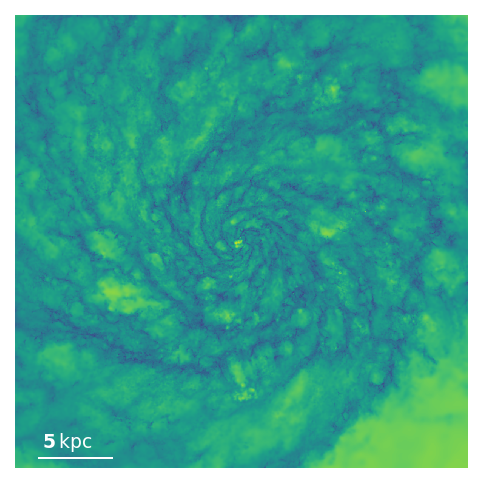

In [8]:
## main call to render
ax, pixel_map =  my_gasStudio.render(
    weight_name='Masses',
    quantity_name='Temperature',
    min_quantity=2,
    max_quantity=7,
    quantity_adjustment_function=np.log10)

Let's add a colorbar and a colorbar label. These properties are specified as keyword arguments to `set_ImageParams`. 

setting use_colorbar to user value of: True
setting cbar_label to user value of: T (K)
cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'Temperature'){} success!
min_Temperature =  2
max_Temperature =  7
Image range (Temperature):  2.9147637 6.6890955
Image range (8bit):  46.652946 239.14388


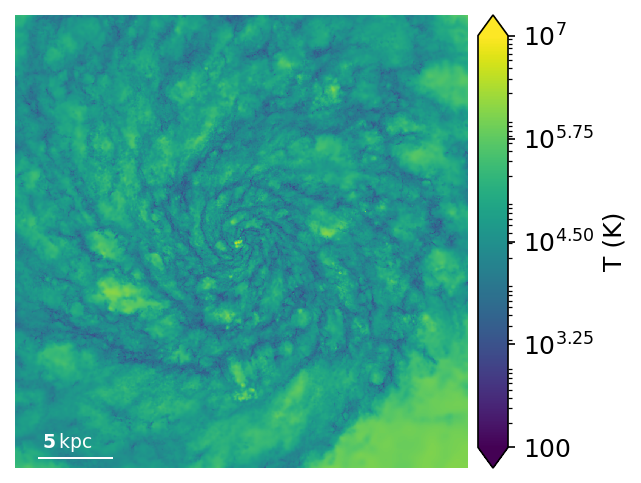

In [9]:
my_gasStudio.set_ImageParams(
    use_colorbar=True,
    cbar_label='T (K)')

ax, pixel_map = my_gasStudio.render(
    weight_name='Masses',
    quantity_name='Temperature',
    min_quantity=2,
    max_quantity=7,
    quantity_adjustment_function=np.log10)

That's looking good! But notice the printed output above: 

>Image range (Temperature):  2.9147222 6.6890903

>Image range (8bit):  46.650833 239.1436

This is telling us that we're not efficiently using the full 256 value color range. Let's change that by passing in `min_quantity=3` and `max_quantity=6.5`

cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'Temperature'){} success!
min_Temperature =  3
max_Temperature =  6.5
Image range (Temperature):  2.9147637 6.6890955
Image range (8bit):  0.0 255.0


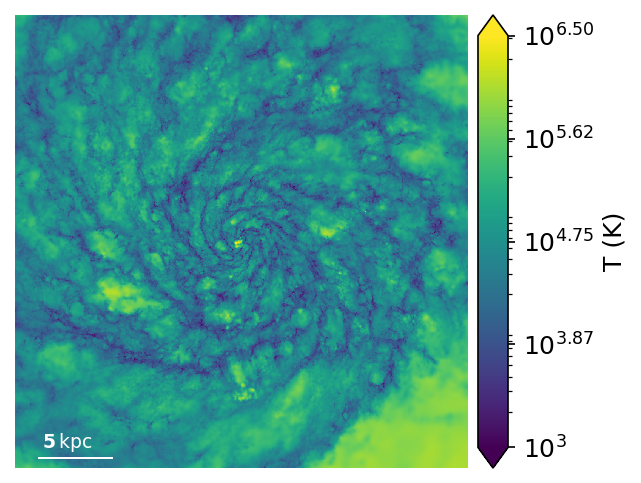

In [10]:
ax, pixel_map = my_gasStudio.render(
    weight_name='Masses',
    quantity_name='Temperature',
    min_quantity=3,
    max_quantity=6.5,
    quantity_adjustment_function=np.log10)

setting theta to user value of: 90
setting aspect_ratio to user value of: 1
setting scale_line_length to user value of: 10
cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta90.00_phi0.00_psi0.00_aspect1.00 inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'Temperature'){} success!
min_Temperature =  3
max_Temperature =  6.5
Image range (Temperature):  2.7982035 6.428994
Image range (8bit):  0.0 249.82672


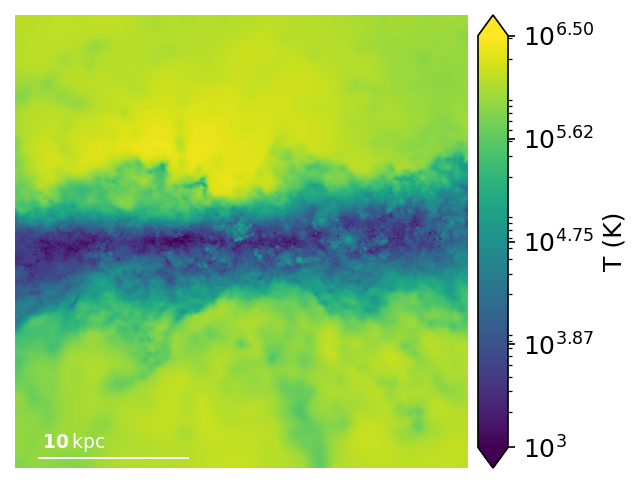

In [11]:
my_gasStudio.set_ImageParams(
    theta=90,
    aspect_ratio=1,
    scale_line_length=10)

ax, pixel_map = my_gasStudio.render(
    weight_name='Masses',
    quantity_name='Temperature',
    min_quantity=3,
    max_quantity=6.5,
    quantity_adjustment_function=np.log10)

setting aspect_ratio to user value of: 0.5
cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta90.00_phi0.00_psi0.00_aspect0.50 inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'Temperature'){} success!
min_Temperature =  3
max_Temperature =  6.5
Image range (Temperature):  2.7982032 6.4289937
Image range (8bit):  0.0 249.82669


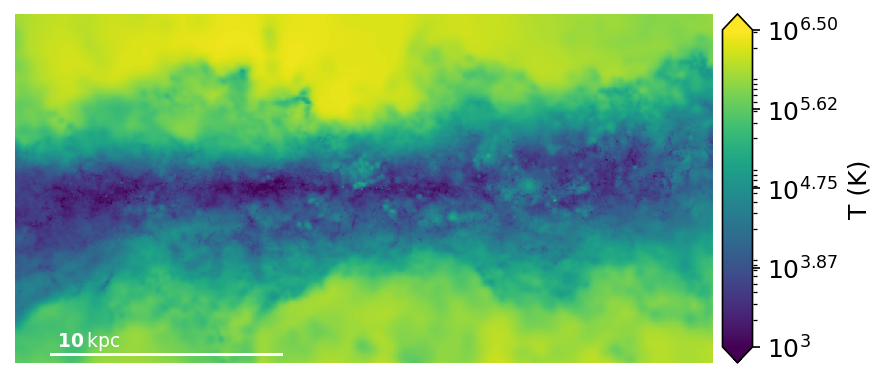

In [12]:
my_gasStudio.set_ImageParams(
    aspect_ratio=0.5)

ax, pixel_map = my_gasStudio.render(
    weight_name='Masses',
    quantity_name='Temperature',
    min_quantity=3,
    max_quantity=6.5,
    quantity_adjustment_function=np.log10)

setting aspect_ratio to user value of: 0.25
cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta90.00_phi0.00_psi0.00_aspect0.25 inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'Temperature'){} success!
min_Temperature =  3
max_Temperature =  6.5
Image range (Temperature):  2.7982035 6.379408
Image range (8bit):  0.0 246.214


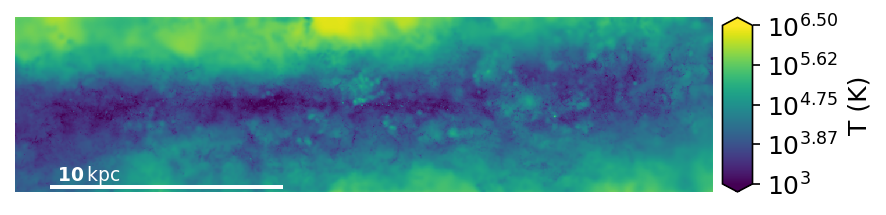

In [13]:
my_gasStudio.set_ImageParams(
    aspect_ratio=0.25)

ax, pixel_map = my_gasStudio.render(
    weight_name='Masses',
    quantity_name='Temperature',
    min_quantity=3,
    max_quantity=6.5,
    quantity_adjustment_function=np.log10)

## Plotting weights instead of quantities

Let's flip the script and instead plot the mass map, rather than the Temperature map. 
This is easily done by instead passing in `min_weight` and `max_weight` rather than `min_quantity` and `max_quantity`. 
We'll also update the image parameters to change the colorbar label. 

In this case, the `weight_adjustment_function` is used to convert between the output map which is the total deposited mass
along the LoS in the pixel to a surface density using the special attribute `my_gasStudio.Acell`, which is the area of 
each pixel in the length units of the coordinates. 

We'll also change the colormap for the thrill of it by passing it as a keyword argument to render. 

setting use_colorbar to user value of: True
setting cbar_label to user value of: $\Sigma_g$ (Msun pc$^{-2}$)
setting cbar_logspace to user value of: True
setting scale_line_length to user value of: 10
setting theta to user value of: 0
setting aspect_ratio to user value of: 1
cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'Temperature'){} success!
min_Masses =  -0.5
max_Masses =  3
Image range (Masses):  -0.965189 3.096508
Image range (8bit):  0.0 255.0


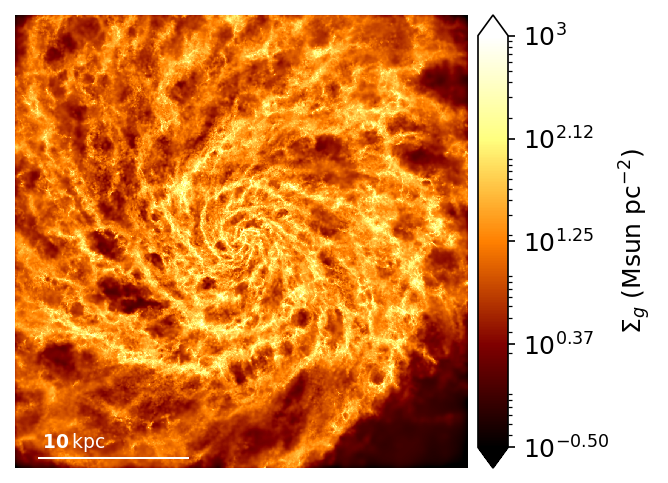

In [14]:
my_gasStudio.set_ImageParams(
    use_colorbar=True,
    cbar_label='$\Sigma_g$ (Msun pc$^{-2}$)',
    scale_line_length=10,
    cbar_logspace=True,
    theta=0,
    aspect_ratio=1)

pixels = my_gasStudio.render(
    weight_name='Masses',
    quantity_name='Temperature',
#    min_quantity=3,
#    max_quantity=6.5,
    quantity_adjustment_function=np.log10,    
    min_weight=-0.5,
    max_weight=3,
    weight_adjustment_function=lambda x: np.log10(x/my_gasStudio.Acell) + 10 - 6, ## msun/pc^2
    cmap='afmhot') 

## Computing a derived quantity and passing it into the projection routine 

One can also compute an arbitrary quantity for each particle and project it along the line-of-sight. 
Let's do the cylindrical radial velocity, for example. 

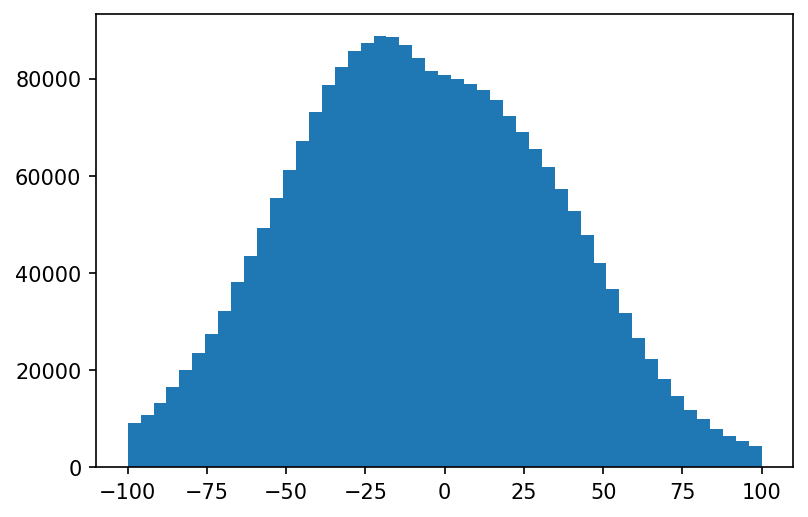

In [15]:
## compute the cylindrical radial velocity by dotting the velocities with their 
##  corresponding cylindrical radial unit vectors
rhats = galaxy.sub_snap['Coordinates']/np.linalg.norm(galaxy.sub_snap['Coordinates'],axis=1)[:,None]
vrs = np.sum(rhats*galaxy.sub_snap['Velocities'],axis=1)

## let's see what these quantities look like
plt.hist(vrs[disk_mask],bins=np.linspace(-100,100,50))
print()## suppress output for cell

Udate the image parameters, first print them to confirm what needs to be changed, then change the ones that don't match (`cbar_label` and `cbar_logspace`). 

In [16]:
my_gasStudio.print_ImageParams()
my_gasStudio.set_ImageParams(
    cbar_label='$v_r$ (km s$^{-1}$)',
    cbar_logspace=False)

use_colorbar = True
cbar_label = $\Sigma_g$ (Msun pc$^{-2}$)
cbar_logspace = True
frame_half_width = 15
frame_half_thickness = 15
frame_center = [0. 0. 0.]
theta = 0
phi = 0
psi = 0
aspect_ratio = 1
pixels = 1200
figure_label = 
scale_bar = True
noaxis = True
savefig = None
fontsize = 12
snapdir = None
snapnum = 600
setting cbar_label to user value of: $v_r$ (km s$^{-1}$)
setting cbar_logspace to user value of: False


Make a "1 color" image of radial velocity

cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 inner_weight_along_los(GasStudio instance, None, 'Masses', array([-384.33050333, -386.96856607,  -60.82537439, ..., -141.17710656,
       -115.19238739, -101.03451018]), 'vr'){} success!
min_vr =  -100
max_vr =  100
Image range (vr):  -154.47926 159.90678
Image range (8bit):  0.0 255.0


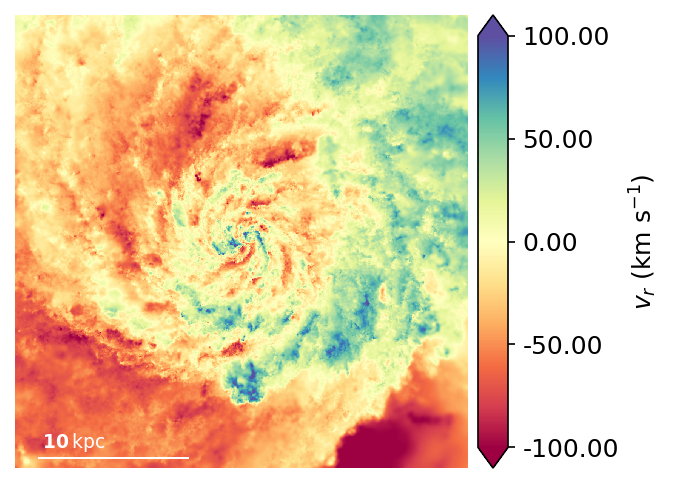

In [17]:
## compute mass weighted radial velocity. 
##  pass vrs in as an array using quantities
pixels = my_gasStudio.render(
    weight_name='Masses',
    quantity_name='vr',
    quantities=vrs,
    min_quantity =-100,
    max_quantity= 100,
    cmap='Spectral')

Make a 2-color image of the radial velocity

## Plotting two color images

cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 inner_weight_along_los(GasStudio instance, None, 'Masses', array([-384.33050333, -386.96856607,  -60.82537439, ..., -141.17710656,
       -115.19238739, -101.03451018]), 'vr'){} success!
min_Masses =  -0.5
max_Masses =  1.8
Image range (Masses):  -0.965189 3.096508
Image range (8bit):  0.0 255.0
min_vr =  -150
max_vr =  150
Image range (vr):  -154.47926 159.90678
Image range (8bit):  0.0 255.0
TODO:Need to create a 2-axis colorbar.


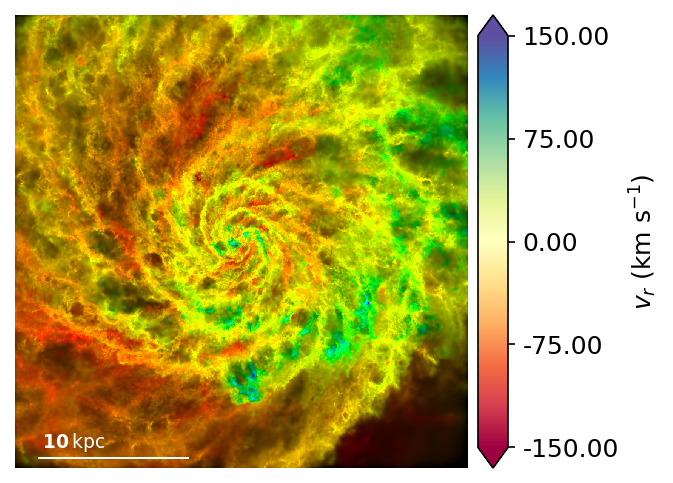

In [18]:
pixels = my_gasStudio.render(
    weight_name='Masses',
    quantity_name='vr',
    quantities=vrs,
    min_quantity =-150,
    max_quantity= 150,
    cmap='Spectral',
    min_weight=-0.5,
    max_weight=1.8,
    weight_adjustment_function=lambda x: np.log10(x/my_gasStudio.Acell) + 10 - 6) ## msun/pc^2
plt.gcf().set_facecolor('white')